<img src=images/film3.jpg width = "1500" height = "4000">

# Business Recommendations for Microsoft

#### _By: Sarah, Brendan and Ben_

- - -

## Project Overview

This notebook displays our bussiiness recomendations for Microsoft's forthcoming movie studio. Our reccomendations follow the film making process in three parts. Our first reccomendatiion is concerned with the pre-production stage, which answers the question of what genres of movies Microsoft should make. Our second reccomendation examines the production phase, which is how long the films should run. Our final reccomendation follows the post-production phase and suggests when films should be released during the calender year.

We find that…. <films in these genres, with a runtime between 85 - 125 minutes, released during blank months> see the highest return on investment both domestically and internationally>

### Importing Data

In [1]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!ls Data

bom.movie_gross.csv.gz  im.db.zip               tmdb.movies.csv.gz
im.db                   rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz
im.db.zip               rt.reviews.tsv.gz


In [3]:
# Reading all the datasets that will be used for the project
tn_df = pd.read_csv('Data/tn.movie_budgets.csv.gz')
tn_df = tn_df.rename(columns = {'title': 'movie'})
database = ("Data/im.db")
connection = sql.connect(database)

In [4]:
# Connecting sqlite3 cursor
query = ''' SELECT * FROM movie_basics'''
sql_df = pd.read_sql_query(query, connection)
sql_df = sql_df.rename(columns = {'primary_title': 'movie'})

### Data Cleaning And Preparation.
The following code blocks clean and merge our data sets into a final master_data set

In [5]:
# Removed commas (,) for easy data manipulation
tn_df['production_budget'] = tn_df['production_budget'].str[1:]
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '').astype(np.int64)
tn_df['domestic_gross'] = tn_df['domestic_gross'].str[1:]
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',', '').astype(np.int64)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str[1:]
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '').astype(np.int64)

In [6]:
# Merging the dataset into one master data.
master_data = tn_df.merge(sql_df, on = 'movie').drop\
(columns = ['original_title', 'start_year', 'id'])

In [7]:
# Removing any duplicates from our dataset.
master_data = master_data.drop_duplicates(subset  = 'movie').set_index('movie_id')


In [8]:
# Create a new column for movies released month.
master_data['release_month'] = master_data['release_date'].str[:3]

In [9]:
# Dropping all the NaN and get our data ready for analysis
master_data.dropna(inplace = True)

### Analysis 1: ROI and Release Month

In [10]:
#Creating two ROIs columns: worldwide ROI & domestic ROI
master_data['domestic_ROI_perc'] = (master_data['domestic_gross'] - master_data['production_budget']) / master_data['production_budget'] * 100

master_data['worldwide_ROI_perc'] =(master_data['worldwide_gross'] - master_data['production_budget']) / master_data['production_budget'] * 100

#### Figure 1A: Domestic ROI in Percentage by Release Month

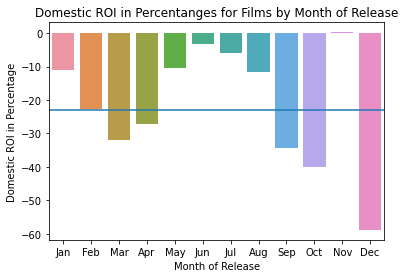

In [11]:
#GRAPH 1: DOMESTIC ROI BY RELEASE MONTH --> PUT MEDIAN ESTIMATOR IN VIA POWER POINT
#risk tolerances, the typical feb month
#if we group eveythhing in this month, the average ROI is this (top of the bar) --> seaborn uses mean by default --> i put it as median
#the horizontal line shows the median domestic ROI for all films in the data set

from numpy import median
fig, ax = plt.subplots()
#setting x and y variables
y1 = master_data['domestic_ROI_perc']
x1 = master_data['release_month']
#graphing variables
ax = sns.barplot(x=x1, y=y1, data=master_data,ci=None, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], estimator=median)
#setting lables and titles and y-axis range
ax.set_title("Domestic ROI in Percentanges for Films by Month of Release")
ax.set_ylabel("Domestic ROI in Percentage")
ax.set_xlabel("Month of Release")
#display median
ax.axhline(master_data['domestic_ROI_perc'].median())
#other edits i can do
    #use the mean for the top of the bar --> show the mean all across

#### Figure 1B: Worldwide ROI in Percentage by Release Month

In [12]:
#DRAFT OF GRAPH 1

#going to start making graphs showing the relationsships between ROI and release month 

#graph 1: release month & domestic roi
#y = master_data['domestic_ROI_perc']
#x = master_data['release_month']

#fig, ax = plt.subplots()
#ax.bar(x,y)

#quesstionss to investigate: how to make a graph to see negativee values, is doing ROI in percent better or should i do plain numbers 
#possible explanations: from the wiki for the oscars; the oscars are usually held in mid to late february or march --> oscars happen and there is a boost in ticket sales or rental/streaming purchaes
#maybe a lot of new releasess come out in jnaury in time for the osccars and other film awards

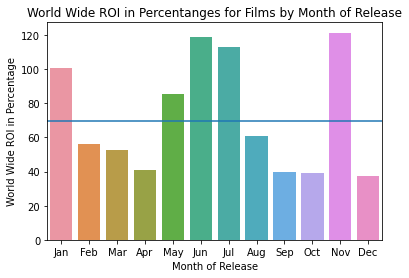

In [13]:
#graph 2: world wide roi and release month
#NOTE: WORLD WIDE ROI INCLUDES DOMESTIC ROI
from numpy import median
fig, ax = plt.subplots()
#setting x and y variables
y2= master_data['worldwide_ROI_perc']
x2 = master_data['release_month']
#graphing variables
ax = sns.barplot(x=x2, y=y2, data=master_data,ci=None, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], estimator=median)
#setting lables and titles and y-axis range
ax.set_title("World Wide ROI in Percentanges for Films by Month of Release")
ax.set_ylabel("World Wide ROI in Percentage")
ax.set_xlabel("Month of Release")
#display median
ax.axhline(master_data['worldwide_ROI_perc'].median())
#other edits i can do
    #use the mean for the top of the bar --> show the mean all across

In [14]:
#DRAFT: graph 2: release month & worldwide_ROI
#y= master_data['worldwide_ROI_perc']
#x = master_data['release_month']

#fig, ax = plt.subplots()
#ax.bar(x,y)

#intial insights: similar pattern as domestic, esp with that feburary thing --> much greater increase for january (could be holiday season, people want or need something to do bc most things are closed and also awards season )

### Analysis 2: ROI and Runtime

Joined the runtime column to the ROI columns and graphed the relationship between the two variables in their respective scatterplots. We find that <conclusion>

In [15]:
#Joining runtime_minutes and worldwide_ROI_perc columns
chart_1 = master_data['runtime_minutes'].to_frame().join(master_data['worldwide_ROI_perc'])

#### Figure 2A: Runtime and Worldwide ROI by Percentages

Text(0.5, 0, 'Runtime Minutes')

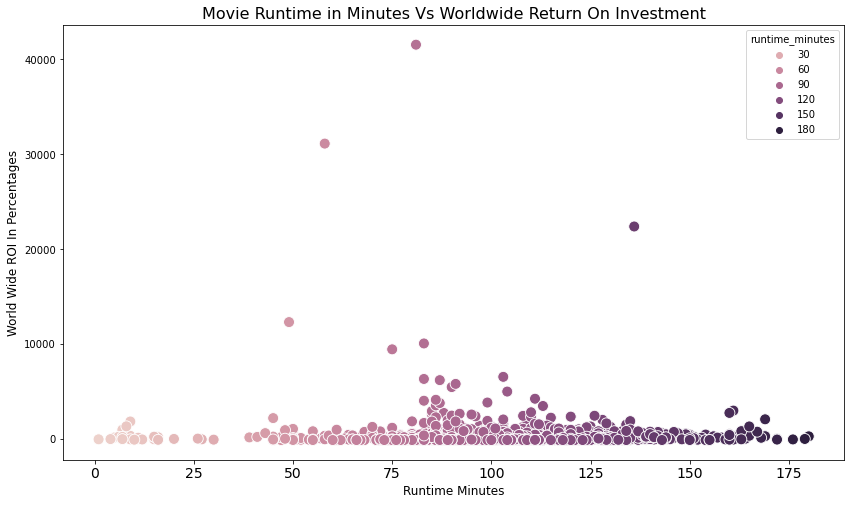

In [16]:
# Visualization of Runtime and Worldwide ROI using Seaborn.
fig, ax = plt.subplots(1,1, figsize = (14, 8))
plt.xticks(fontsize=14, rotation=0)
x_df= chart_1['runtime_minutes']
y_df = chart_1['worldwide_ROI_perc']
ax= sns.scatterplot(x = x_df, y = y_df, data = chart_1, hue = 'runtime_minutes', s = 120)

# Setting titles and adjusting the font size.
ax.set_title("Movie Runtime in Minutes Vs Worldwide Return On Investment", fontsize = 16)
ax.set_ylabel("World Wide ROI In Percentages", fontsize = 12)
ax.set_xlabel("Runtime Minutes", fontsize = 12)

In [17]:
# As shown in our chart above, most of movies between 80 - 125 minutes of runtime 
# tend to generate more revenue worldwide.

In [18]:
# The average movie runtime is around 102 minutes which comes with an average of 270% in ROI worldwide.
chart_1.describe()

,runtime_minutes,worldwide_ROI_perc
count,2131.000000,2131.000000
mean,102.025809,269.580988
std,21.682337,1386.114581
min,1.000000,-100.000000
25%,90.000000,-62.415420
50%,101.000000,69.642556
75%,113.000000,265.626834
max,180.000000,41556.474000


In [19]:
#Joining runtime_minutes and domestic_ROI_perc columns
chart_2 = master_data['runtime_minutes'].to_frame().join(master_data['domestic_ROI_perc'])

#### Figure 2b: Runtime and Domestic ROI by Percentages

Text(0.5, 0, 'Runtime Minutes')

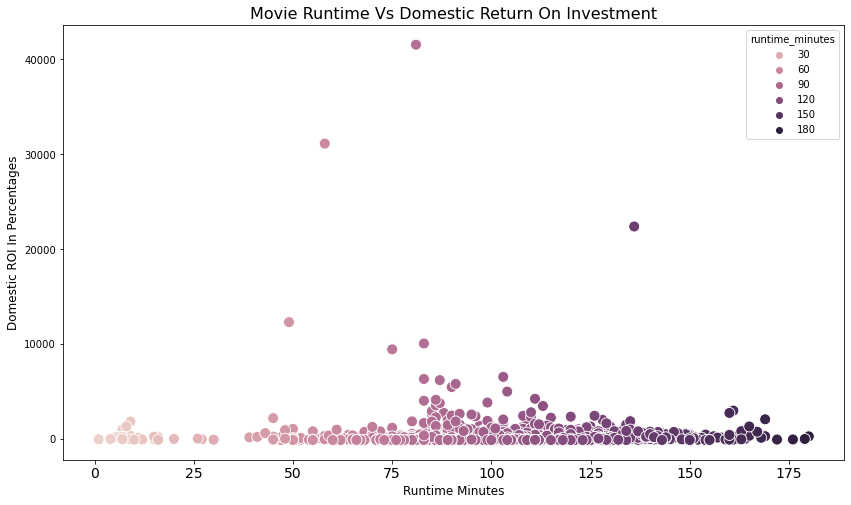

In [20]:
# Visualization of Runtime and Domestic ROI using Seaborn.
fig, ax = plt.subplots(1,1, figsize = (14, 8))
plt.xticks(fontsize=14, rotation=0)
x_2= chart_2['runtime_minutes']
y_2 = chart_2['domestic_ROI_perc']
ax= sns.scatterplot(x = x_df, y = y_df, data = chart_1, hue = 'runtime_minutes', s = 120)

# Setting titles and adjusting the font size.
ax.set_title("Movie Runtime Vs Domestic Return On Investment", fontsize = 16)
ax.set_ylabel("Domestic ROI In Percentages", fontsize = 12)
ax.set_xlabel("Runtime Minutes", fontsize = 12)

In [21]:
# Most movies are between 80 - 125 minutes with an average runtime of 102 minutes.
# Domestic mean average ROI is about 98% compared to worldwide which is around 270% in ROI.
# I Would recommend Microsoft Studios to produce movies between 80 - 125 minutes of runtime.. 

In [22]:
chart_2.describe()

,runtime_minutes,domestic_ROI_perc
count,2131.000000,2131.000000
mean,102.025809,97.958780
std,21.682337,773.776451
min,1.000000,-100.000000
25%,90.000000,-85.472797
50%,101.000000,-22.922454
75%,113.000000,82.772138
max,180.000000,22664.410000


### Analysis 3: ROI and Genres

In [23]:
master_data = master_data.drop_duplicates(subset  = 'movie').set_index('movie')

In [24]:
genre = master_data['genres'].to_frame().join(master_data['worldwide_ROI_perc'])
genre

,genres,worldwide_ROI_perc
movie,,
Avatar,Horror,553.257713
Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",154.667286
Dark Phoenix,"Action,Adventure,Sci-Fi",-57.210757
Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",324.384139
Avengers: Infinity War,"Action,Adventure,Sci-Fi",582.711400
...,...,...
Clean,"Comedy,Drama,Horror",1287.110000
Cure,Drama,845.960000
Newlyweds,"Comedy,Drama",-49.066667


In [25]:
Action = genre[(genre.genres.str.contains('Action'))]
Action['worldwide_ROI_perc'].median()

103.19536571428571

In [26]:
Action['worldwide_ROI_perc'].describe()

count      509.000000
mean       214.532751
std       1038.717949
min       -100.000000
25%        -27.634870
50%        103.195366
75%        262.136393
max      22400.000000
Name: worldwide_ROI_perc, dtype: float64

In [27]:
Action = genre[(genre.genres.str.contains('Action'))]
Adventure = genre[(genre.genres.str.contains('Adventure'))]
Animation = genre[(genre.genres.str.contains('Animation'))]
Biography = genre[(genre.genres.str.contains('Biography'))]
Comedy = genre[(genre.genres.str.contains('Comedy'))]
Crime = genre[(genre.genres.str.contains('Crime'))]
Drama = genre[(genre.genres.str.contains('Drama'))]
Fantasy = genre[(genre.genres.str.contains('Fantasy'))]
Horror = genre[(genre.genres.str.contains('Horror'))]
Music = genre[(genre.genres.str.contains('Music'))]
Musical = genre[(genre.genres.str.contains('Musical'))]
Mystery = genre[(genre.genres.str.contains('Mystery'))]
Romance = genre[(genre.genres.str.contains('Romance'))]
SciFi = genre[(genre.genres.str.contains('Sci-Fi'))]
Thriller = genre[(genre.genres.str.contains('Thriller'))]
War = genre[(genre.genres.str.contains('War'))]

In [28]:
genre_dfs = [Action, Adventure, Animation, Biography, Comedy, Crime, Drama, Fantasy, Horror, Music, Musical, Mystery, Romance, SciFi, Thriller, War]

In [29]:
genres_df_counts = []

for genre in genre_dfs:
    print(genre.count())

genres_df_counts

genres                509
worldwide_ROI_perc    509
dtype: int64
genres                395
worldwide_ROI_perc    395
dtype: int64
genres                115
worldwide_ROI_perc    115
dtype: int64
genres                176
worldwide_ROI_perc    176
dtype: int64
genres                638
worldwide_ROI_perc    638
dtype: int64
genres                294
worldwide_ROI_perc    294
dtype: int64
genres                1058
worldwide_ROI_perc    1058
dtype: int64
genres                141
worldwide_ROI_perc    141
dtype: int64
genres                264
worldwide_ROI_perc    264
dtype: int64
genres                73
worldwide_ROI_perc    73
dtype: int64
genres                13
worldwide_ROI_perc    13
dtype: int64
genres                159
worldwide_ROI_perc    159
dtype: int64
genres                252
worldwide_ROI_perc    252
dtype: int64
genres                167
worldwide_ROI_perc    167
dtype: int64
genres                361
worldwide_ROI_perc    361
dtype: int64
genres                29
wo

[]

In [30]:
Action_median = Action['worldwide_ROI_perc'].median()
Adventure_median = Adventure['worldwide_ROI_perc'].median()
Animation_median = Animation['worldwide_ROI_perc'].median()
Biography_median = Biography['worldwide_ROI_perc'].median()
Comedy_median = Comedy['worldwide_ROI_perc'].median()
Crime_median = Crime['worldwide_ROI_perc'].median()
Drama_median = Drama['worldwide_ROI_perc'].median()
Fantasy_median = Fantasy['worldwide_ROI_perc'].median()
Horror_median = Horror['worldwide_ROI_perc'].median()
Music_median = Music['worldwide_ROI_perc'].median()
Musical_median = Musical['worldwide_ROI_perc'].median()
Mystery_median = Mystery['worldwide_ROI_perc'].median()
Romance_median = Romance['worldwide_ROI_perc'].median()
SciFi_median = SciFi['worldwide_ROI_perc'].median()
Thriller_median = Thriller['worldwide_ROI_perc'].median()
War_median = War['worldwide_ROI_perc'].median()

In [31]:
genre_df_medians = pd.DataFrame([['Action', Action_median], ['Adventure', Adventure_median], ['Animation', Animation_median], ['Biography', Biography_median], ['Comedy', Comedy_median], ['Crime', Crime_median], ['Drama', Drama_median], ['Fantasy', Fantasy_median], ['Horror', Horror_median], ['Music', Music_median], ['Musical', Musical_median], ['Mystery', Mystery_median], ['Romance', Romance_median], ['SciFi', SciFi_median], ['Thriller', Thriller_median], ['War', War_median]], columns=['genre', 'worldwide_ROI_perc'])

In [32]:
top5_genre_ROI = genre_df_medians.sort_values(by='worldwide_ROI_perc',ascending=False).head()

#### Figure 3A: Relationship between Worldwide ROI by Percentages and genres

Text(0.5, 0, 'Genre')

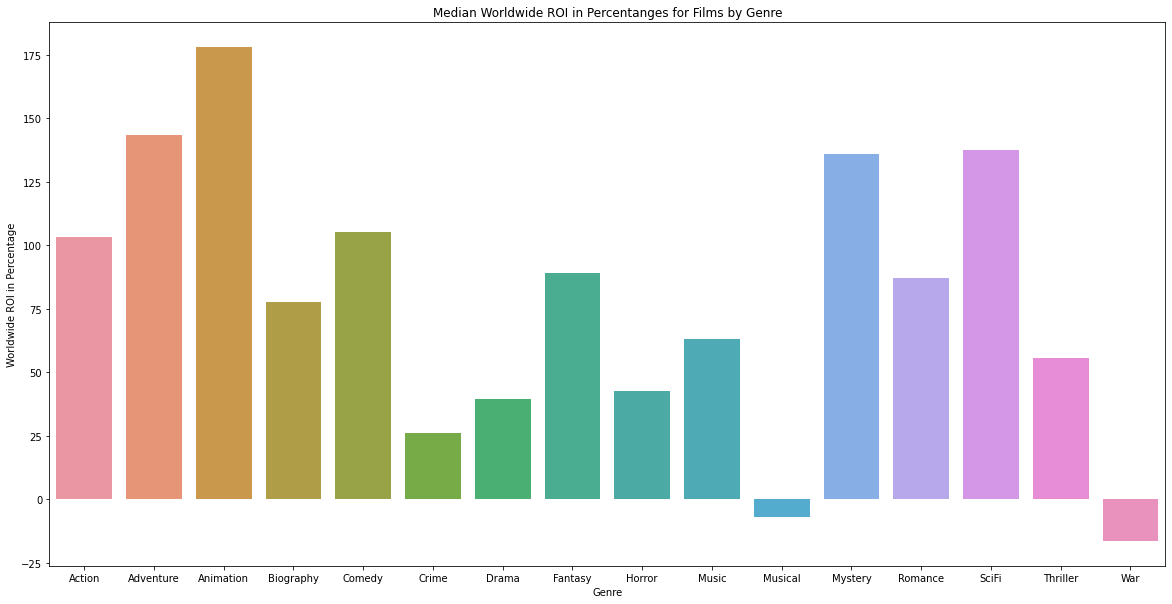

In [33]:
#graph 1: relationship between worldwide ROI and genre 
fig, ax = plt.subplots(figsize=(20, 10))


#setting x and y variables 
y1 = genre_df_medians['worldwide_ROI_perc']
x1 = genre_df_medians['genre']


#graphing variables
ax = sns.barplot(x=x1, y=y1, data=genre_df_medians)


#setting lables and titles
ax.set_title("Median Worldwide ROI in Percentanges for Films by Genre")
ax.set_ylabel("Worldwide ROI in Percentage")
ax.set_xlabel("Genre")



#we can also use median as the estimator by doing this:
#from numpy import median
#y = master_data['Worldwide_ROI_perc']
#x = master_data['genre']

#ax = sns.barplot(x=x, y=y, data=genre_df_medians, estimator=median).set(title="Median Worldwide ROI in Percentanges for Films by Genre")

#ax.set_xlabel("Genre")
#ax.set_ylabel("Worldwide ROI in Percentages")

#### Figure 3B: Worldwide ROI by Percentages and Genres

Text(0.5, 0, 'Genre')

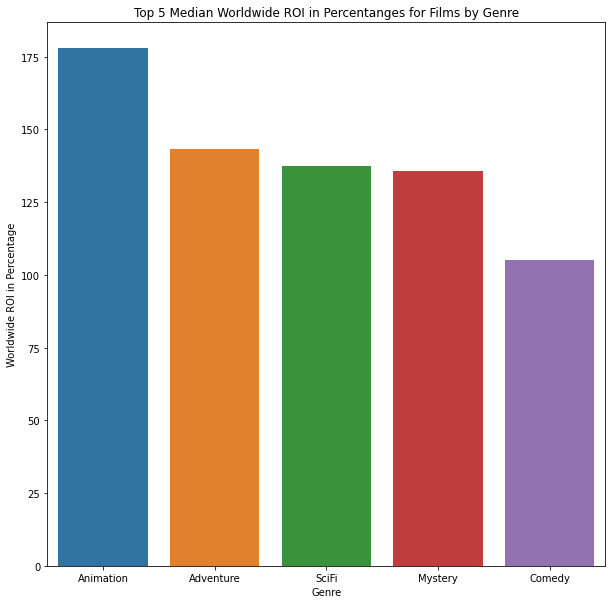

In [34]:
#graph 1: Highest worldwide ROI by genre 
fig, ax = plt.subplots(figsize=(10, 10))


#setting x and y variables 
y1 = top5_genre_ROI['worldwide_ROI_perc']
x1 = top5_genre_ROI['genre']


#graphing variables
ax = sns.barplot(x=x1, y=y1, data=top5_genre_ROI)


#setting lables and titles
ax.set_title("Top 5 Median Worldwide ROI in Percentanges for Films by Genre")
ax.set_ylabel("Worldwide ROI in Percentage")
ax.set_xlabel("Genre")

#Notes: The genres Musical and War both have sample sizes lower than 30 and should be interpreted cautiously.
#Notes: There are some overlaps between the genres because some movies had multiple genre classifications such as Crime/Drama.
#Notes: Drama, Comedy, Action, Adventure, and Thriller had the largest value counts with 1058, 638, 509, 395, and 361, respectively.
#Notes: Highest Worldwide ROI in descending order was Animation, Adventure, SciFi, Mystery, and Comedy with 177.99, 143.29, 137.54, 135.80, and 105.12, respectively


#we can also use median as the estimator by doing this:
#from numpy import median
#y = master_data['domestic_ROI_perc']
#x = master_data['release_month']

#ax = sns.barplot(x=x, y=y, data=genre_df_medians, estimator=median).set(title="Top 5 Median Worldwide ROI in Percentanges for Films by Genre")

#ax.set_xlabel("Genre")
#ax.set_ylabel("Worldwide ROI in Percentages")

Note: The genres Musical and War both have sample sizes lower than 30 and should be interpreted cautiously.
There are some overlaps between the genres because some movies had multiple genre classifications such as Crime/Drama.

Drama, Comedy, Action, Adventure, and Thriller had the largest value counts with 1058, 638, 509, 395, and 361, respectively.

Highest Worldwide ROI in descending order was Animation, Adventure, SciFi, Mystery, and Comedy with 177.99, 143.29, 137.54, 135.80, and 105.12, respectively

## ROI and Genres Conclusion:

Based on the median return on investment percentage when looking at our genres, the most profitable genres Microsoft should focus their movies in are Animation, Adventure, SciFi, Mystery, and Comedy. With a large sample size and by focusing on the median, thus discounting any potential outliers affecting the data, we can confidently assert our findings.